In [8]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy
from qca import QCA
from states import make_state
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.optimize import curve_fit
from os import makedirs
import matplotlib.pyplot as plt
import measures as ms
import numpy as np
%matplotlib inline
der=r"/home/lhillber/documents/research/cellular_automata/qca/data/"

In [9]:
import qca
import core
import matrix
from importlib import reload
reload(qca)
reload(core)
reload(matrix)
from qca import QCA

In [3]:
params_template = dict(
              L=15,
              T=100.0,
              dt=1.0,
              R=6,
              r=1,
              V="H",
              BC="1-00",
              IC="c1_f0",
              E=0.0,
              N=1,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

params = copy(params_template) 

Q = QCA(params, der=der)
    
Q.run(tasks=["rhoj", "rhojk"], verbose=False)

Running
{'L': 15, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'H', 'IC': 'c1_f0', 'BC': '1-00', 'E': 0.0, 'N': 1, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}
Running
{'L': 15, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'H', 'IC': 'c1_f0', 'BC': '1-00', 'E': 0.0, 'N': 1, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}


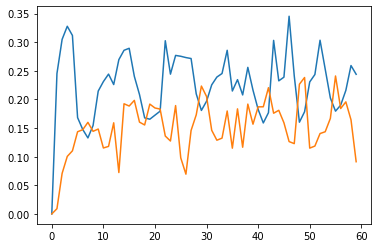

In [4]:
plt.plot(Q.Y(1)[:60])
plt.plot(Q.C(1)[:60])

In [2]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
import qca
import core
import matrix
from importlib import reload
reload(qca)
reload(core)
reload(matrix)
from qca import QCA

from states import make_state
from matrix import rdm, ptranspose


In [3]:
from matrix import listkron
from core1d import rule_hamiltonian
from numpy.linalg import eigh
from scipy.linalg import expm
from measures import get_expectation, get_rhoj, expectation
from matrix import ops


H = rule_hamiltonian(V="X", R=5, L=6, r=1, BC="0")
initstate = make_state(6, "f2")
vals, vecs  = eigh(H)


In [10]:
L=10
H = rule_hamiltonian(V="X", R=1, L=L, r=1, BC="0")
vals, vecs  = eigh(H)



In [44]:
initstate = make_state(L, "d2")
initstate_eng = np.dot(np.conj(vecs).T, initstate)

Astr = ["I"]*L
for d in [0, 1]:
    Astr[int(L/2)+d] = "Z"
A = matrix.listkron([matrix.ops[op] for op in Astr])

Aeng = (vecs.T).dot(A).dot(vecs)

diag = sum(np.abs(C)**2 * Aeng[a,a] for a, C in enumerate(initstate_eng)).real


E0 =np.sum(vals*np.abs(initstate_eng)**2)
dE = np.sqrt(np.sum((vals-E0)**2*np.abs(initstate_eng)**2))

microcanon = np.mean([Aeng[a,a]
                        for a, Ea in enumerate(vals) 
                            if np.abs(Ea-E0)<=dE]).real 

ebH = expm(-H/dE)
part = np.trace(ebH)
thstate = ebH / part
canonical = expectation(thstate, A)

print(diag, microcanon, canonical)


-0.26369311224743586 0.002058499097625141 0.0010185145471689576


In [34]:
dE

2.2360679774997894

In [35]:
dEs

array([0.01      , 0.3271749 , 0.64434981, 0.96152471, 1.27869961,
       1.59587452, 1.91304942, 2.23022433, 2.54739923, 2.86457413,
       3.18174904, 3.49892394, 3.81609884, 4.13327375, 4.45044865,
       4.76762355, 5.08479846, 5.40197336, 5.71914827, 6.03632317])

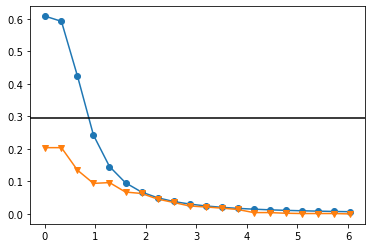

In [37]:
plt.plot(dEs, canonicals, marker="o")
plt.plot(dEs, -np.array(microcanons), marker="v")
plt.axhline(diag, c="k")
#plt.xscale("log")

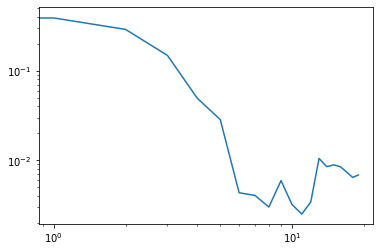

In [41]:
plt.loglog(np.array(canonicals)+np.array(microcanons))

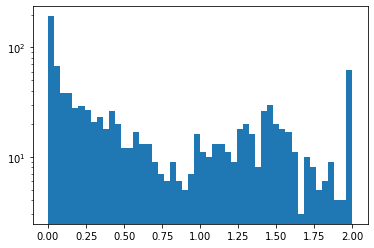

In [23]:
plt.hist(np.abs(np.diff(np.diag(Aeng))).real, bins=50)
plt.yscale("log")

(array([3.12000e+02, 1.60000e+01, 8.90000e+01, 9.25000e+02, 1.30415e+05,
        4.65665e+05, 9.88000e+02, 2.92000e+02, 7.60000e+01, 1.16000e+02]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -6.66133815e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

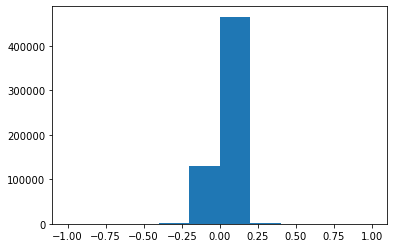

In [20]:
plt.hist(Aeng[Aeng!=0].real)